In [20]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as sp
import ipywidgets as widgets

This notebook follows rather closely Prof. Atkins' introduction to enzyme kinetics linked below
https://depts.washington.edu/wmatkins/kinetics/michaelis-menten.html

## Michaelis-Menten equation

The Michaelis-Menten equation is ubiquitous in enzyme kinetics and pharmacodynamics. It is an approximation of the reaction velocity of the irreversible catalysis of a product by an enzyme acting on a substrate and takes the the form

$$\nu = \frac{V_{max}[S]}{K_M + [S]}$$

where $\nu$ is the reaction velocity, $[S]$ the substate concentration, $V_{max}$ the maximum velocity obtained when $[S]\rightarrow\infty$, and $K_M$ the Michaelis-Menten constant which we will derive below. The substrate $S$ binds reversibly to a free enzyme $E$ and forms an enzyme-substrate complex $ES$. Both unbinding and catalysis regenerate the free enzyme $E$. We can graphically represent the reaction as follows

$$\ce{E + S <=>[k_{on}][k_{off}] ES ->[k_{cat}] E + P}$$

where $k_{on}$ and $k_{off}$ are the association and dissociation rates, and $k_{cat}$ the rate of catalysis and formation of the product $P$. The differential equations for this reaction are given by


\begin{align}
\frac{d[S]}{dt} &= -k_{on}[E][S] + k_{off}[ES], \\
\frac{d[E]}{dt} &= -k_{on}[E][S] + k_{off}[ES], \\
\frac{d[ES]}{dt} &= k_{on}[E][S] - (k_{off} + k_{cat})[ES], \\
\frac{d[P]}{dt} &= k_{cat}[ES].
\end{align}

We then make a **steady-state approximation** in which we assume that after a short transient period the substrate, free enzyme, and enzyme substrate concentrations reach equilibrium unless a substantial amount of substrate is depleted and at which point the rate of production of product, which is what we call the reaction velocity
$$ \nu = k_{cat}[ES],$$
is constant. The third equation is the most useful for our purposes. At steady-state the can set the derivatives on the r.h.s. to 0 and using the fact that the free enzyme concentration is related to the total enzyme concentration and EC complex concentration by

$$[E] = [E_T] - [ES]$$

we can write

$$0 = k_{on}([E_T] - [ES])[S] - (k_{off} + k_{cat})[ES].$$

and isolating $[ES]$

$$[ES] = \frac{[E_T][S]}{\frac{k_{off} + k_{cat}}{k_{on}} + [S]}.$$

The constant in the denominator gives us the Michaelis-Menten constant

$$K_M = \frac{k_{off} + k_{cat}}{k_{on}}.$$

Therefore the reaction velocity

\begin{align}
\frac{d[P]}{dt} &= k_{cat}[ES], \\
&= \frac{k_{cat}[E_T][S]}{\frac{k_{off} + k_{cat}}{k_{on}} + [S]}.
\end{align}

When the substrate concentration $[S]\rightarrow\infty$ the reaction velocity saturates at $V_{max} = k_{cat}[E_T]$ and therefore

$$\nu = \frac{V_{max}[S]}{K_M + [S]},$$

the Michaelis-Menten equation. Sometimes the following alternative equivalent form is used

$$\nu = \frac{V_{max}}{1 + \frac{K_M}{[S]}}$$

which we obtain simply by dividing the numerator and denominator by $[S]$. Note that when $[S] = K_M$ the reaction velocity reaches half its maximum value, i.e. $\left.\nu\right\vert_{[S]\rightarrow K_M} = V_{max}/2$.

## Interactive examples of Michaelis-Menten kinetics
Haven't figured out how to run multiple interactive figures at the same time so you have to re-evaluate the cell each time.

interactive(children=(FloatSlider(value=1.0, description='KM', max=10.0, min=0.01, step=0.01), Output()), _dom…

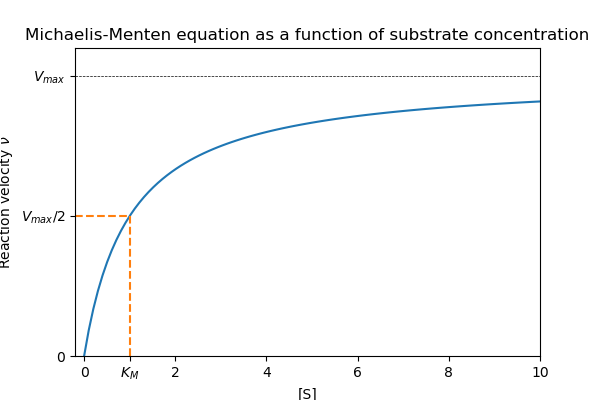

In [24]:
plt.close()
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(False)
ax.set_ylim([0, 1.1])
ax.set_xlim([-0.2, 10])
ax.set_xlabel('[S]')
ax.set_ylabel(r'Reaction velocity $\nu$')
ax.set_title('Michaelis-Menten equation as a function of substrate concentration')
S = np.linspace(0, 10, 100)

@widgets.interact(KM=(0.01, 10, 0.01))
def michaelismenten(KM=1):
    [l.remove() for l in ax.lines]
    [l.remove() for l in ax.texts]
    ax.set(xticks=list(range(0, 11, 2)) + [KM], xticklabels=[str(i) for i in range(0, 11, 2)] + [r'$K_M$'])
    ax.set(yticks=[0, 0.5, 1], yticklabels=[0, r'$V_{max}/2$', r'$V_{max}$'])
    ax.plot(S, S / (KM + S), color='C0')
    ax.plot([-0.2, KM], [1/2, 1/2], color='C1', linestyle='dashed')
    ax.plot([KM, KM], [0, 1/2], color='C1', linestyle='dashed')
    ax.plot([-0.2, 10], [1, 1], color='black', linestyle='dashed', lw=0.5)

#

interactive(children=(FloatSlider(value=1.0, description='S', max=10.0, step=0.01), Output()), _dom_classes=('…

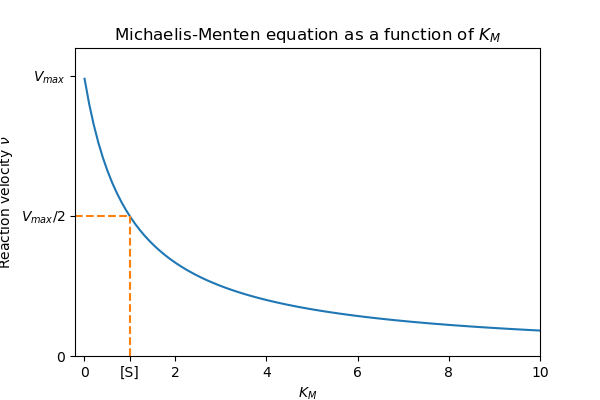

In [25]:
plt.close()
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(False)
ax.set_ylim([0, 1.1])
ax.set_xlim([-0.2, 10])
ax.set_xlabel(r'$K_M$')
ax.set_ylabel(r'Reaction velocity $\nu$')
ax.set_title(r'Michaelis-Menten equation as a function of $K_M$')
KM = np.linspace(0.01, 10, 100)

@widgets.interact(S=(0.0, 10, 0.01))
def michaelismenten(S=1):
    [l.remove() for l in ax.lines]
    [l.remove() for l in ax.texts]
    ax.set(xticks=list(range(0, 11, 2)) + [S], xticklabels=[str(i) for i in range(0, 11, 2)] + ['[S]'])
    ax.set(yticks=[0, 0.5, 1], yticklabels=[0, r'$V_{max}/2$', r'$V_{max}$'])
    ax.plot(KM, S / (KM + S), color='C0')
    ax.plot([-0.2, S], [1/2, 1/2], color='C1', linestyle='dashed')
    ax.plot([S, S], [0, 1/2], color='C1', linestyle='dashed')    

## Enzyme kinetics in the presence of an antagonist

Now lets introduce a competitive antagonist A. When the enzyme E is bound to A into an EA complex it does nothing. The reaction diagram becomes

\begin{align}
&\ce{E + S <=>[k_{on}][k_{off}] ES ->[k_{cat}] E + P}\\
&\ce{E + A <=>[k^A_{on}][k^A_{off}] EA}
\end{align}

The only two differential equation we need are $d[ES]/dt$ the the ER complex and $[A]$ for the antagonist concentration. Writing them directly at equilibrium,
\begin{align}
0 & = k_{on} [E][S] - (k_{off} + k_{cat}) [ES],\\
0 & = -k^A_{on} [E][A] + k_{off}^A [EA].
\end{align}

The free enzyme concentration is now given by $[E] = [E_T] - [ES] - [EA]$ and let the antagonist dissociation constant $k_D^A = k^A_{off}/k^A_{on}$. The second equilibrium condition gives us the steady-state concentration of EA complex
\begin{equation}
[EA] = \frac{([E_T] - [ES])[A]}{k_D^A + [A]}.
\end{equation}
Using $[EA]$ together with the first equilibrium condition and after some algebra we can write the concentration of for the EA complex
\begin{equation*}\begin{split}
[ES] &= \frac{1}{K_M}\left([E_T] - [ES] - [EA]\right)[S],\\
&=\frac{1}{K_M}\left([E_T] - [ES]\right)\left(1 - \frac{[A]}{K_D^A + [A]}\right)[S].
\end{split}\end{equation*}
After shuffling terms around to isolate $[ES]$ we find
\begin{equation}
[ES] = \frac{[E_T][S]}{K_M\left(1 + \frac{[A]}{k_D^A}\right) + [S]},
\end{equation}
and the reaction velocity in the presence of an antagonist
\begin{equation}
\nu^A = \frac{V_{max}[S]}{K_M\left(1 + \frac{[A]}{k_D^A}\right) + [S]}
\end{equation}
where once again the maximum velocity $V_{max} = k_{cat}[E_T]$ when the substrate concentration $[S]\rightarrow\infty$ independently of the antagonist concentration.

Let the reaction velocity in the presence of an antagonist and in the absence of an antagonist $\nu^A = \nu$ and write $[S^A]$ to indicate $[S]$ in the presence of an antagonist and $[S]$ in the absence of an antagonist. We have
\begin{align}
\nu^A &= \nu,\\
\Rightarrow \frac{[S^A]}{K_M\left(1 + \frac{[A]}{k_D^A}\right) + [S^A]} &= \frac{[S]}{K_M + [S]},\\
\Rightarrow \frac{1}{1 + \frac{K_M\left(1 + \frac{[A]}{K^A_D}\right)}{[S^A]}} &= \frac{1}{1 + \frac{K_M}{[S]}},\\
\Rightarrow \frac{K_M\left(1 + \frac{[A]}{K^A_D}\right)}{[S^A]} &= \frac{K_M}{[S]},\\
\Rightarrow \frac{[S^A]}{[S]} &= 1 + \frac{[A]}{K_D^A} = r^A.
\end{align}
In other words for a fixed reaction velocity, $r^A$ represents the ratio of substrate concentration required to overcome the action of the antagonist. Measurement of $r^A$ allows the estimation of the dissociation constant $K_D^A$ of the antagonist. One can think of the effect of antagonist as renormalizing the Michaelis-Menten constant
$$K_M^A = K_M\left(1 + \frac{[A]}{K_D^A}\right) = r^A K_M.$$

interactive(children=(FloatSlider(value=1.0, description='KM', max=10.0, min=0.01, step=0.01), FloatSlider(val…

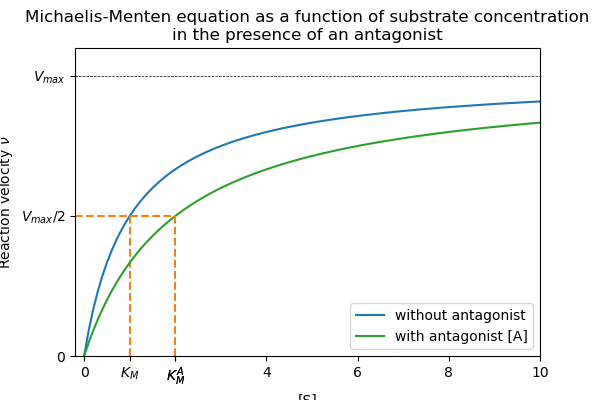

In [26]:
plt.close()
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(False)
ax.set_xlabel('[S]')
ax.set_ylabel(r'Reaction velocity $\nu$')
ax.set_title('Michaelis-Menten equation as a function of substrate concentration\nin the presence of an antagonist')
S = np.linspace(0, 10, 100)

@widgets.interact(KM=(0.01, 10, 0.01), A=(0.01, 10, 0.01), KDA=(0.01, 10, 0.01))
def michaelismenten(KM=1, A=1, KDA=1):
    [l.remove() for l in ax.lines]
    [l.remove() for l in ax.texts]
    ax.set(xticks=list(range(0, 11, 2)) + [KM, KM*(1 + A/KDA)], xticklabels=[str(i) for i in range(0, 11, 2)] + [r'$K_M$', r'$K_M^A$'])
    ax.set(yticks=[0, 0.5, 1], yticklabels=[0, r'$V_{max}/2$', r'$V_{max}$'])
    ax.plot(S, S / (KM + S), color='C0', label='without antagonist')
    ax.plot([-0.2, KM*(1 + A/KDA)], [1/2, 1/2], color='C1', linestyle='dashed')
    ax.plot([KM, KM], [0, 1/2], color='C1', linestyle='dashed')
    ax.plot([-0.2, 10], [1, 1], color='black', linestyle='dashed', lw=0.5)
    ax.plot(S, S / (KM*(1 + A/KDA) + S), color='C2', label='with antagonist [A]')
    ax.plot([KM*(1 + A/KDA), KM*(1 + A/KDA)], [0, 1/2], color='C1', linestyle='dashed')
    ax.set_ylim([0, 1.1])
    ax.set_xlim([-0.2, 10])
    ax.legend(loc='lower right')


## Enzyme kinetics in the presence of multiple antagonists

Now that we've tackled the case in the presence of a single antagonist, let's find the general case in the presence of an arbitrary number of antagonists $A_i$ where $i=1\ldots N$. The reaction diagram

\begin{align}
&\ce{E + S <=>[k_{on}][k_{off}] ES ->[k_{cat}] E + P}&\\
&\ce{E + A_i <=>[k^i_{on}][k^i_{off}] EA_i}&i = 1\ldots N
\end{align}

where it is understood that the association and dissociation $k^i_{on/off}$ rates with a superscript $i$ refer to those of the $i$-th antagonist. In the presence of multiple antagonists the free enzyme concentration $[E] = [E_T] - [ES] - \sum_{i=1}^N [EA_i]$, it is trivial to show that the equilibrium condition for the enzyme-substrate complex now becomes

\begin{equation}
[ES] = \frac{1}{K_M}\left([E_T] - [ES] - \sum_i [EA_i]\right) [S].
\tag{1}
\end{equation}

We just need to handle the sum and we are done. Using the previous result for the enzyme-antagonist complex we immediately generalize
\begin{equation}
[EA_i] = \frac{\left([E_T] - [ES] - \sum_{j\neq i} [EA_j]\right) [A_i]}{K_D^{i} + [A_i]}.
\end{equation}
With the benefit of hindsight define $q_i = [A_i]/K^i_D$ and therefore we can rewrite the previous equation
\begin{equation}
\frac{1}{q_i}[EA_i] +\sum_j [EA_j] = [E_T] - [ES].
\end{equation}
Let $\mathbf{q} = \operatorname{diag}[q_1, q_2, \ldots, q_N]$, the vector of ones $\mathbf{1} = (1, 1, \ldots, 1)$, and the vector of enzyme-antagonist concentrations $\mathbf{[EA]} = ([EA_1], [EA_2], \ldots, [EA_N])$. We therefore have in matrix notation
\begin{align}
(\mathbf{q}^{-1} + \mathbf{1}\mathbf{1}^T)\mathbf{[EA]} & = ([E_T] - [ES])\mathbf{1}\\
\Rightarrow \mathbf{[EA]} & = ([E_T] - [ES]) (\mathbf{q}^{-1} + \mathbf{1}\mathbf{1}^T)^{-1}\mathbf{1}
\end{align}
Using the [Sherman-Morris formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula) for the inverse of rank-1 update to a previously inverted matrix we solve for the vector of enzyme-antagonist concentrations
\begin{equation}
\mathbf{[EA]} = ([E_T] - [ES]) \left(\mathbf{q} + \frac{\mathbf{q} \mathbf{1}\mathbf{1}^T \mathbf{q}}{1 + \mathbf{1}^T \mathbf{q}\mathbf{1}}\right)\mathbf{1}.
\end{equation}
Finally, let $Q = \sum_{i=1}^N q_i$ and therefore the sum of enzyme-antagonist concentrations
\begin{align}
\sum_{i=1}^N [EA_i] &= \mathbf{1}^T \mathbf{[EA]}, \\
&= ([E_T] - [ES]) \mathbf{1}^T\left(\mathbf{q} + \frac{\mathbf{q} \mathbf{1}\mathbf{1}^T \mathbf{q}}{1 + \mathbf{1}^T \mathbf{q}\mathbf{1}}
\right)\mathbf{1},\\
&= ([E_T] - [ES])\left(\mathbf{1}^T\mathbf{q}\mathbf{1} + \frac{\mathbf{1}^T \mathbf{q} \mathbf{1}\mathbf{1}^T \mathbf{q}\mathbf{1}}{1 + \mathbf{1}^T \mathbf{q}\mathbf{1}}\right), \\
&= ([E_T] - [ES])\left(Q + \frac{Q^2}{1 + Q}\right),\\
&= ([E_T] - [ES])\frac{Q}{1 + Q}.
\end{align}
Plugging this result in Eq. (1)
\begin{align}
[ES] &= \frac{1}{K_M}\left([E_T] - [ES] - \sum_i [EA_i]\right) [S],\\
&= \left([E_T] - [ES]\right)\frac{1}{K_M}\left(1 - \frac{Q}{1 + Q}\right)[S],\\
&= \frac{\left([E_T] - [ES]\right) [S]}{K_M(1 + Q)}
\end{align}
and solving for $[ES]$
\begin{align}
[ES] &= \frac{[E_T][S]}{K_M(1 + Q) + [S]},\\
&= \frac{[E_T][S]}{K_M\left(1 + \sum_i\frac{[A_i]}{K_D^i}\right) + [S]}.
\end{align}
Finally the reaction velocity
\begin{equation}
\nu = k_{cat}[ES] = \frac{V_{max}[S]}{K_M\left(1 + \sum_i\frac{[A_i]}{K_D^i}\right) + [S]}
\end{equation}
where once again $V_{max} = \lim_{[S]\rightarrow\infty} k_{cat}[ES] = k_{cat} [E_T]$. In hindsight this result appears almost trivial when compared to the case of a single antagonist wherein we simply replace $[A]/K^A_D$ by the sum $\sum_i [A_i]/K^i_D$. Once again the compensation ratio
$$r^\mathbf{A} = 1 + \sum_i\frac{[A_i]}{K_D^i}.$$